# Own Feedback for Exercise 1: Monte-Carlo Simulation

Team members:

*   Rudolf Braun 
*   Jannik Schacht
*   Kieran Didi



# Exercise 1.1: Data Creation and Visualization


In [ ]:
import numpy as np
import numpy.random as ra
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import sklearn
import math

For inverse transform sampling we need to work out the CDFs for both likelihoods (given $X \in [0,1] \; \wedge \;  c \in [0,1]$)

-> for $Y=0: P(X=x|Y=0) = 2-2x$

CDF (c) is integral of this wrt x: $c = \int (2-2x) dx = 2x - x²$

Inverse-CDF: $x_1 = 1 - \sqrt{1-c} \; \vee \; x_2 = 1 + \sqrt{1-c}$

$x_{2}$ is ignored because $x_{2} \notin [0,1]$ for all $c \neq 1$.

-> for $Y=1: P(X=x|Y=1) = 2x$

CDF is integral of this wrt x: $c = \int (2x) dx = x²$ 

Inverse-CDF: $x_1 = \sqrt{c} \; \vee \; x_2 = -\sqrt{c}$

$x_{2}$ is ignored because $x_{2} \notin [0,1]$ for all $c \neq 0$.

In [ ]:
#this function does what the exercises requires
def create_data(N): #N is number of data instances
    labels = ra.uniform(0,1,N) #sample from uniform distribution to get a label
    labels[labels >= 0.5] = 1 #assign labels based on random sampling
    labels[labels < 0.5] = 0
    features = []
    
    for i in labels:
        rand = float(ra.uniform(0,1,1)) #sample from uniform distribution to get a random number as input for inverse CDF
        if i==1:
            features.append(math.sqrt(rand))
        elif i==0:
            features.append(1-math.sqrt(1-rand))
        else:
            print("Error; label assignement did not work")
        
    return labels, features

<font color='green'><b>
The function create_data does the job it is supposed to do, comparable to the sample solution. In the first part when assigning the labels, we avoid using a for-loop by using conditional slicing of the numpy array, but for assigning the features we have to use a for-loop too. Besides these minor differences and the additional error message we generate in case something goes wrong, the solutions are equivalent.
<br><br>
When creating the dataset for visualisation, we use a for loop to separate the samples with label 1 or 0, whereas the sample solution uses just slices the given array into the relevant sections which is more elegant in this case.
<br><br>
Finally, when visualising the results, we visualised only the likelihoods since this seemed to be the important part of the function, getting the right priors for class Y on the other hand seemed quite trivial in comparison and was explicitly implemented in 1 line in create_data, therefore we did not create a separate histogram for this.
</b></font>

In [ ]:
y,x = create_data(100000)

#print(y)
#print(x)

counter = 0
x0 = []
x1 = []

#split datasets via label for better visualisation
for i in x:
    if y[counter]==1:
        x1.append(i)
    elif y[counter]==0:
        x0.append(i)
    counter+=1
    
print(x0)
print(x1)

[0.05465398311631309, 0.735048103562279, 0.32234690327414417, 0.5395668417086081, 0.11703247747589218, 0.5368414360061884, 0.011357690596409675, 0.7542716470510124, 0.024062569497311448, 0.5564302864583963, 0.060974405398088516, 0.3532664067850121, 0.3055982166158804, 0.1677620076935008, 0.34552626221636973, 0.26116731468305776, 0.35667599784992243, 0.15029191582726764, 0.34614144694940907, 0.2895006750318496, 0.24754269448634392, 0.3220833507350901, 0.37513972471572765, 0.19907322520730986, 0.49659090097493674, 0.21309729673025501, 0.1951037571937243, 0.023525107806659618, 0.09175856255703285, 0.25057822530923124, 0.3719666210365833, 0.4577312572615678, 0.8908707809622218, 0.2150216474091352, 0.6084670416730256, 0.27173534826918067, 0.446647412285589, 0.23442592273995544, 0.478841217968755, 0.01980672014338236, 0.3520593238021402, 0.05502883287689464, 0.6356595608994948, 0.03304222137372437, 0.04105098919437766, 0.028219605074322973, 0.00638742087898958, 0.5930141914983935, 0.28147862

(array([  20.,   69.,  117.,  131.,  198.,  216.,  253.,  316.,  310.,
         378.,  409.,  458.,  502.,  493.,  546.,  633.,  666.,  679.,
         805.,  799.,  849.,  847.,  924.,  888.,  985.,  996., 1041.,
        1162., 1179., 1120., 1242., 1202., 1317., 1305., 1391., 1431.,
        1505., 1566., 1534., 1573., 1672., 1579., 1608., 1685., 1775.,
        1815., 1884., 1865., 1869., 1953.]),
 array([0.00410272, 0.02402023, 0.04393774, 0.06385525, 0.08377277,
        0.10369028, 0.12360779, 0.1435253 , 0.16344282, 0.18336033,
        0.20327784, 0.22319535, 0.24311287, 0.26303038, 0.28294789,
        0.30286541, 0.32278292, 0.34270043, 0.36261794, 0.38253546,
        0.40245297, 0.42237048, 0.44228799, 0.46220551, 0.48212302,
        0.50204053, 0.52195804, 0.54187556, 0.56179307, 0.58171058,
        0.60162809, 0.62154561, 0.64146312, 0.66138063, 0.68129814,
        0.70121566, 0.72113317, 0.74105068, 0.7609682 , 0.78088571,
        0.80080322, 0.82072073, 0.84063825, 0.86055576, 

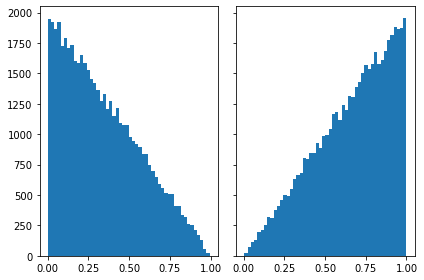

In [ ]:
#histogram plotting
n_bins = 50

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

#color= ['red' if l == 0 else 'green' for l in y]
# We can set the number of bins with the `bins` kwarg
axs[0].hist(x0, bins=n_bins)
axs[1].hist(x1, bins=n_bins)

# Exercise 1.2: Classification by Thresholding

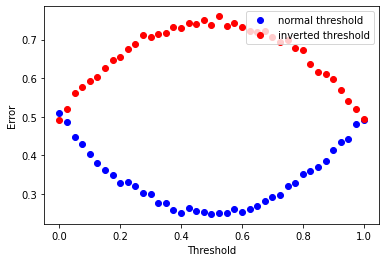

In [ ]:
# this function creates a list with features x and labels y deriving x similar to the approach in 1.1
def create_data_alt(N): # N is the number of data instances
    Y = np.random.randint(2, size=N) # generates a random list of labels 0 or 1
    rand = np.random.random(N)
    X = [np.sqrt(rand[i]) if Y[i]==1 else 1-np.sqrt(rand[i]) for i in range(N)] # generates a random list of features depending on the labels
    return [X, Y]

# labels the features X according to a threshold t and compares it to the true labels Y, gives back an error rate
def test_threshold(X, Y, t):
    prediction = [0 if i<t else 1 for i in X] # create a list of prdicted labels
    err_count = [1 if prediction[i] != Y[i] else 0 for i in range(len(Y))] # detect errors in prediction
    rate = sum(err_count)/len(Y) # calculate the error rate
    return rate

# this function works similar to the function above except "<" is now ">"
def anti_test(X, Y, t):
    prediction = [0 if i>t else 1 for i in X]
    err_count = [1 if prediction[i] != Y[i] else 0 for i in range(len(Y))]
    rate = sum(err_count)/len(Y)
    return rate

n = 40 # number of thresholds that are tested
N = 4000 # number of data instances
rates = [test_threshold(*create_data_alt(N), i/n) for i in range(n+1)] # list with error rates for different thresholds
anti_rates = [anti_test(*create_data_alt(N), i/n) for i in range(n+1)] # list with error rates for different thresholds with anti-classifier

# create plot
plt.plot(np.linspace(0,1,n+1),rates, 'bo', label="normal threshold")
plt.plot(np.linspace(0,1,n+1),anti_rates, 'ro', label="inverted threshold")
plt.legend(loc = 'upper right')
plt.xlabel("Threshold")
plt.ylabel("Error")
plt.show()

The error rates show the quadratic dependence on the threshold with a minimum at (0.5, 0.25) for the normal threshold labeling and the corresponding maximum at (0.5, 1-0.25) for the inverted threshold labeling.

<font color='green'><b>
The first function create_data_alt is not neccessary, but was created because the code of 1.1 and 1.2 where developed indipendently. To make the whole code more elegant the following functions could have been changed so they can use the function of 1.1.

<font color='green'><b>
To calculate the error rate for different classifiers new functions where created, instead of just using the same function leaving the classifier optional, making the program less compact. 

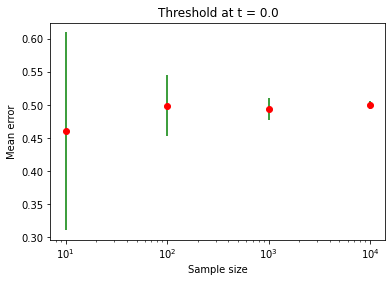

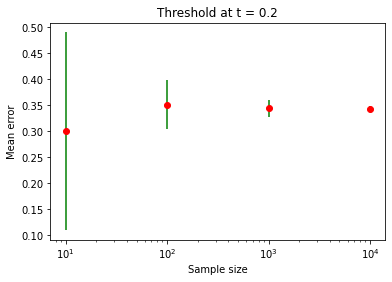

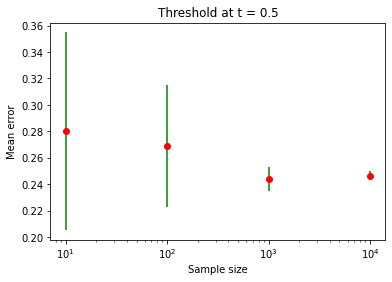

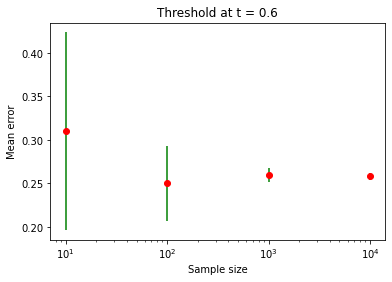

In [ ]:
# calculates the mean and standard deviation of 10 samples of M points with threshold at t
def statistics(M, t):
    rates = [test_threshold(*create_data_alt(M), t) for i in range(10)]
    return np.mean(rates), np.std(rates)

M = [10, 100, 1000, 10000] # sample sizes
T = [0.0, 0.2, 0.5, 0.6] # thresholds

# loop that plots the mean error rate of the threshold predictions with the standard deviation as error for different sample sizes M and thresholds T
for t in T:
    for m in M:
        mean, std = statistics(m, t)
        plt.errorbar([m], [mean], yerr = [std], fmt='o', ecolor='g', color='r')
    plt.xscale('log')
    plt.title("Threshold at t = " + str(t))
    plt.xlabel("Sample size")
    plt.ylabel("Mean error")
    plt.show()

The mean errors approach the same values for samples of 10000 points as calculated before. The standard deviation (green error bars) of the ten sets decreases with increasing sample size.

<font color='green'><b>
The run count was not integrated in this functions, but in the function "statistic" calculating the mean and standard deviation. This by itself would lead to only a few more lines of code, but because this statistic function was defined for every threashold seperately the code became much longer (see 1.3).

<font color='green'><b>
The presentation of the data is visually presented better than in the sample solution.

# Exercise 1.3: Baseline Classifiers

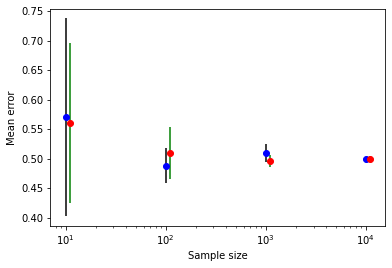

In [ ]:
# There is no need to call create_data() and pass a test set to this function, 
# since the classifier does not use the features.
def test_guessing(N):
    Y = np.random.randint(2, size=N) # creates random true labels
    prediction = np.random.randint(2, size=N) # predicts random labels
    err_count = [1 if prediction[i] != Y[i] else 0 for i in range(N)] # detects errors in prediction
    rate = sum(err_count)/N # calculate the error rate
    return rate

# There is no need to call create_data() and pass a test set to this function, 
# since the classifier does not use the features.
def test_constant(N):
    Y = np.random.randint(2, size=N) # creates random true labels
    prediction = [1]*N # predicts labels always as 1
    err_count = [1 if prediction[i] != Y[i] else 0 for i in range(N)] # detects errors in prediction
    rate = sum(err_count)/N # calculate the error rate
    return rate

# calculates the mean and standard deviation of 10 samples of M points with guessed labels
def statistics_guessing(M):
    rates = [test_guessing(M) for i in range(10)]
    return np.mean(rates), np.std(rates)

# calculates the mean and standard deviation of 10 samples of M points with constant labels
def statistics_constant(M):
    rates = [test_constant(M) for i in range(10)]
    return np.mean(rates), np.std(rates)

M = [10, 100, 1000, 10000] # sample sizes

# loop that plots the mean error rate of the threshold predictions with the standard deviation as error for different sample sizes M and thresholds T
for m in M:
    mean_g, std_g = statistics_guessing(m)
    mean_c, std_c = statistics_constant(m)
    plt.errorbar([m], [mean_c], yerr = [std_c], fmt='o', ecolor='k', color='b')
    plt.errorbar([m*1.1], [mean_g], yerr = [std_g], fmt='o', ecolor='g', color='r') # the factor 1.1 is inserted to seperate the points in the plot
plt.xscale('log')
plt.xlabel("Sample size")
plt.ylabel("Mean error")
plt.show()

The two "classifiers" (red: guessing, blue: constant) show the same statistical properties in terms of error rates and standard deviation of error rates. The constant classifier is equivalent to the threshold classifier with threshold t=0 .

---

<font color='green'><b>
Difference to sample solution:
<br>
- Both solutions are structured in functions, but differently.
- The sample solution implements the classifiers in separate functions, which is a bit more elegant, whereas we defined a functions that implement the classifier and calculate the error at the same time.
- We defined a separate function for running the test several times and calculating mean and standard deviation. 
- The sample solution uses a function called evaluate_classifier which can be used with any classifier and therefore is more elegant.
- The sample solution creates a test set for measuring the error by calling the create_data function, whereas we are creating only labels directly in the test function. This does work as well, because both classifieres ignore the features and therefore no features are needed. This is a more performant solution, while the sample solution is a bit more elegant.
- In addition to the graphical output (which is easier to read in our solution), the sample solution outputs mean and standard deviation for both classifiers as a table. 
</b></font>

<font color='green'><b>
Nevertheless, both solutions use the same test sizes M and repeat each test with 10 different test sets. The outcome is about the same. The resulting values show similar characteristics. Both solutions can confirm the error rate of 50%.
</b></font>

# Exercise 1.4: Nearest Neighbour Classification

At first, the *create_data()* function from exercise 1.1 needs to be modified.

It must make sure that the created data set contains at least one instance of each class (Y=0 and Y=1). 

This does also mean that N must be at least 2.

---

<font color='green'><b>
In order to make the NN-classifier work, this modification is necessary. This step is not shown in the sample solution though.
<br><br>
Instead, the sample solution contains a function get_balanced_data, which is used to create a balanced training data set (equal amount of instances for each class). This was not required by the task, which is why the below function does only make sure that there is at least one instance of each class.
<br><br>
The outcome is not much different for larger N, since we derive the labels from uniform distribution.
</br></font>

In [ ]:
def create_data_2(N):                 # N is number of data instances
    if N < 2:                         # check range of N
        print("Error: N must be at least 2.")
        return [],[]

    labels = ra.uniform(0, 1, N)      # sample from uniform distribution to get N-2 labels
    labels[0] = 0.0                   # add two more labels with values 0 and 1 to make sure there is at least one instance of either class.
    labels[1] = 1.0
    labels[labels >= 0.5] = 1         # assign labels based on random sampling
    labels[labels < 0.5] = 0
    features = []
    
    for i in labels:
        rand = float(ra.uniform(0,1,1))   #sample from uniform distribution to get a random number as input for inverse CDF
        if i==1:
            features.append(math.sqrt(rand))
        elif i==0:
            features.append(1-math.sqrt(1-rand))
        else:
            print("Error; label assignement did not work")
        
    return labels, features

Next, the nearest neighbour classifier is implemented.

A training set consisting of features und labels needs to be passed to the function as Xtrain and Ytrain. 

For a given feature Xtest, the function returns the predicted label.

---

<font color='green'><b>
Due to the structure of the create_data function, we have to pass three parameters to the NN-classifier function. 
<br><br>
Our create_data function differs to the one in the sample solution by returning two lists, one containing features and one containing labels, instead of a single data structure.
<br><br>
Apart from that, this function is equivalent to the one in the sample solution.
 </b></font>

In [ ]:
# predicts Ytest for a given Xtest using a training set Xtrain, Ytrain and nearest neighbour classification
def toy_nearest_neighbor(Xtest, Xtrain, Ytrain):

    # calculate difference between Xtest and every X of the training set
    X_diff = [abs(Xtest - x) for x in Xtrain]

    # choose index where the difference is minimal (nearest training instance)
    i_head = np.argmin(X_diff)

    # return label of the nearest training instance
    return Ytrain[i_head]

The following function is used to compute the average error of the nearest neigbour classifier. 

The size of the training and test sets used for the computation have to be passed to the function.

The function computes the average error using 100 different training sets and one test set.

---

<font color='green'><b>
Unlike the sample solution, we implemented a function that measures the average error of the NN-classifier. This makes it possible to reuse the code when running tests with any desired size of the training and test set, making this solution a bit more elegant. This function is used for N=2 as well as N=100.
<br><br>
The way this function calculates the average error is equivalent to how it is done in the sample solution. However, unlike the sample solution, this function does not calculate the standard deviation, since it was not required by the task.
</b></font>

In [ ]:
# compute average error of nearest neigbour classifier
# N = size of training set
# M = size of test set
def toy_nearest_neighbor_error(N, M):

    # this variable counts the errors
    errors = 0

    # create a new test set of size M
    Ytest, Xtest = create_data_2(M)

    # repeat computation with 100 different training sets
    iterations = 100
    for i in range(iterations):
        
        # create a new training set of size N
        Ytrain, Xtrain = create_data_2(N)

        # test classifier with every element of the test set
        for y,x in zip(Ytest, Xtest):

            if y != toy_nearest_neighbor(x, Xtrain, Ytrain):
                # prediction not correct
                errors += 1

    # calculate and return average error
    return errors / (iterations * M)

Finally, the above functions are used to compute the error rates of the nearest neighbour classifier. 

10000 has been chosen as the size of the test set. The error rate is computed for training set size N = 2 as well as N = 100.

---

<font color='green'><b>
The size chosen for the test set is equivalent to the sample solution.
</b></font>

In [ ]:
# a size of 10000 elements for the test set is considered to be sufficiently large 
# calculate average error for training sets of size N=2
error = toy_nearest_neighbor_error(2, 10000) * 100
print("Error for N=2:", error, "%")

# calculate average error for training sets of size N=100
error = toy_nearest_neighbor_error(100, 10000) * 100
print("Error for N=100:", error, "%")

Error for N=2: 35.3458 %
Error for N=100: 32.7308 %


The results show an average error of about 35% for the nearest neighbour classifier. 

A larger training set decreases the error rate.

---

<font color='green'><b>
The calculated error rates are in about the same range as the ones in the sample solution.
</b></font>
